In [1]:
#Loading Libraries: 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

# 1- Loading Data & Exploratory Data Analysis (EDA)

In [2]:
#loading data: 
house_df = pd.read_csv("/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv")

In [3]:
#Viewing the data : 
house_df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
house_df.shape

(2000, 10)

In [5]:
#exploring the data : 
house_df.info()
house_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [6]:
house_df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

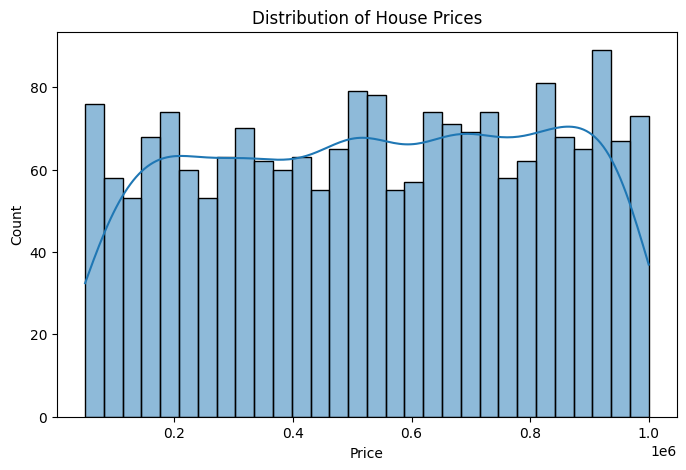

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(house_df['Price'], kde=True, bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


# 2- Data Preparation

In [8]:
house_df = house_df.drop(columns=['Id'])

In [9]:
house_df.select_dtypes(include=['object']).columns

Index(['Location', 'Condition', 'Garage'], dtype='object')

**Reminder**💡
- pd.get_dummies() is a Pandas function that converts categorical columns into numeric columns using **One-Hot Encoding** method.



In [10]:
house_df["Condition"].unique()


array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [11]:
# Ordinal mapping for 'Condition'
condition_order = {'Fair': 0, 'Good': 1, 'Excellent': 2 , 'Poor' : 3}
house_df['Condition'] = house_df['Condition'].map(condition_order)

# Binary encoding for 'Garage'
house_df['Garage'] = house_df['Garage'].map({'No': 0, 'Yes': 1})

In [12]:
house_df["Location"].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [13]:
house_df["Location"] = house_df["Location"].map({'Downtown' : 0 , 'Suburban' : 1 , 'Urban' : 2 , 'Rural' : 3}) 

In [14]:
house_df.dtypes

Area         int64
Bedrooms     int64
Bathrooms    int64
Floors       int64
YearBuilt    int64
Location     int64
Condition    int64
Garage       int64
Price        int64
dtype: object

In [15]:
house_df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [16]:
#Splitting the data: 
X = house_df.drop("Price", axis=1)
y = house_df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3- Modeling

In [17]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

# 4- Evaluation 

👉 Rule:

Classification → Accuracy/Precision/Recall/F1

Regression → R², MAE, RMSE, MSE

**R² (Coefficient of Determination)** : tells us how much of the variation in the data is explained by the model.

R² = 1 → perfect prediction 

R² = 0 → Guessing

R² < 0 → model is worse than guessing


In [18]:
# make predictions
pred = model.predict(X_test)

# calculate R²
r2 = r2_score(y_test, pred)
print("R² score:", r2)

R² score: -0.008392928258588395


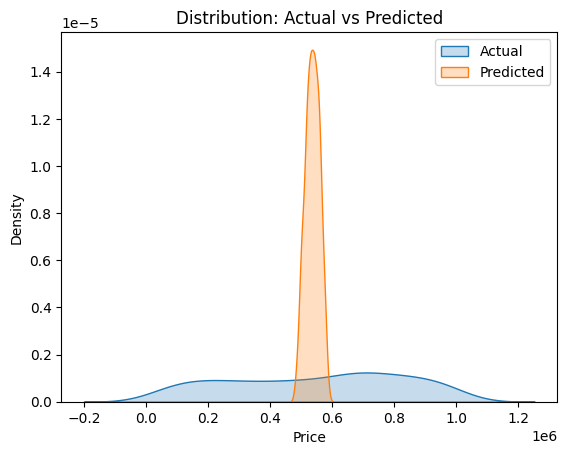

In [19]:

sns.kdeplot(y_test, label="Actual", fill=True)
sns.kdeplot(pred, label="Predicted", fill=True)
plt.legend()
plt.title("Distribution: Actual vs Predicted")
plt.show()


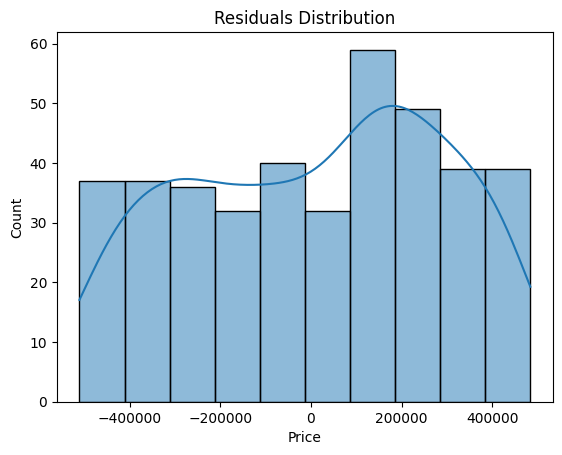

In [20]:
residuals = y_test - pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


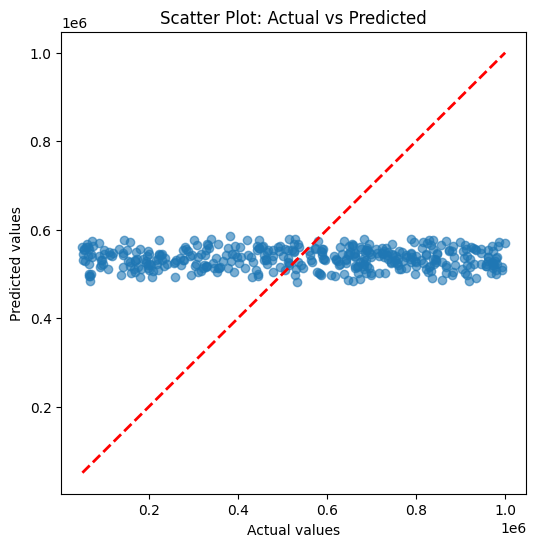

In [21]:

plt.figure(figsize=(6,6))

# Scatter plot
plt.scatter(y_test, pred, alpha=0.6)

# Add the diagonal perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2)

# Titles and labels
plt.title("Scatter Plot: Actual vs Predicted")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

plt.show()


# 5- Model Optimization

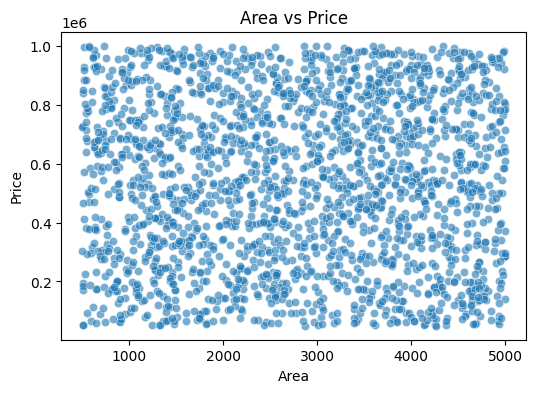

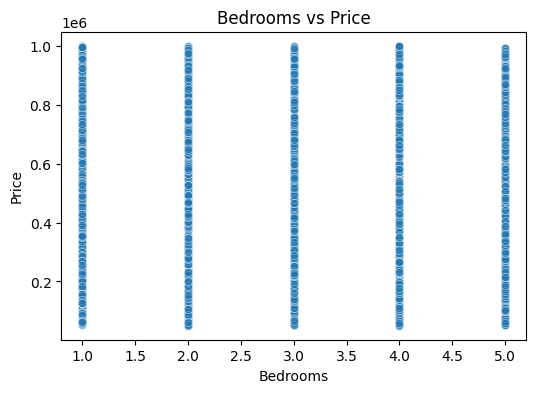

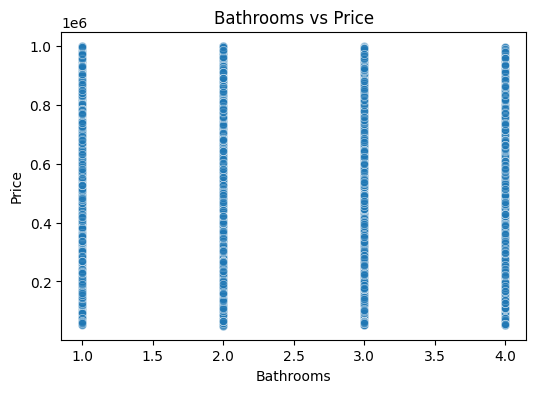

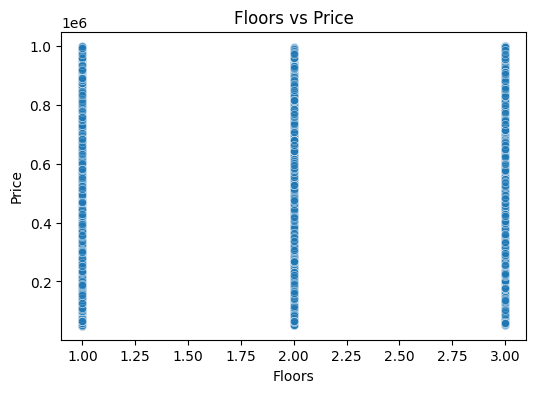

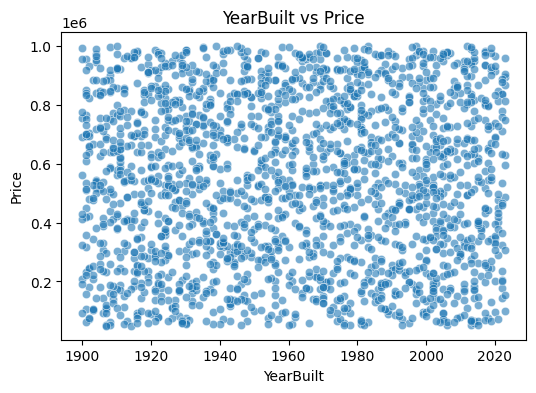

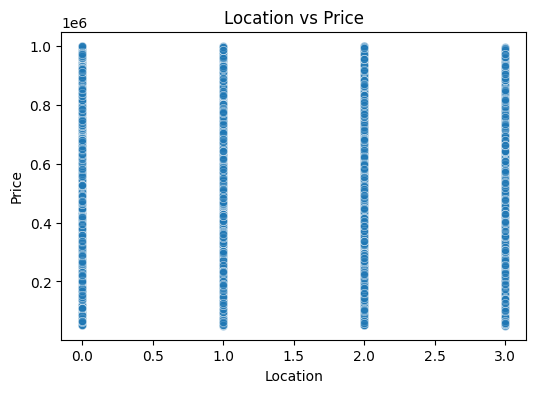

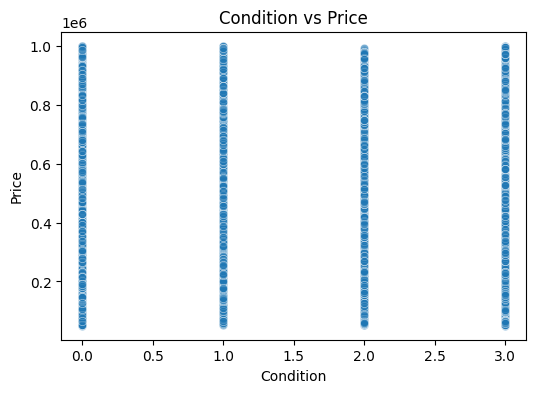

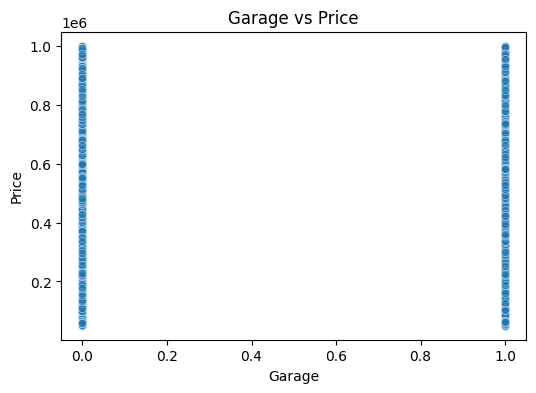

In [22]:
target = "Price"
features = [col for col in house_df.columns if col != target]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=house_df[feature], y=house_df[target], alpha=0.6)
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()


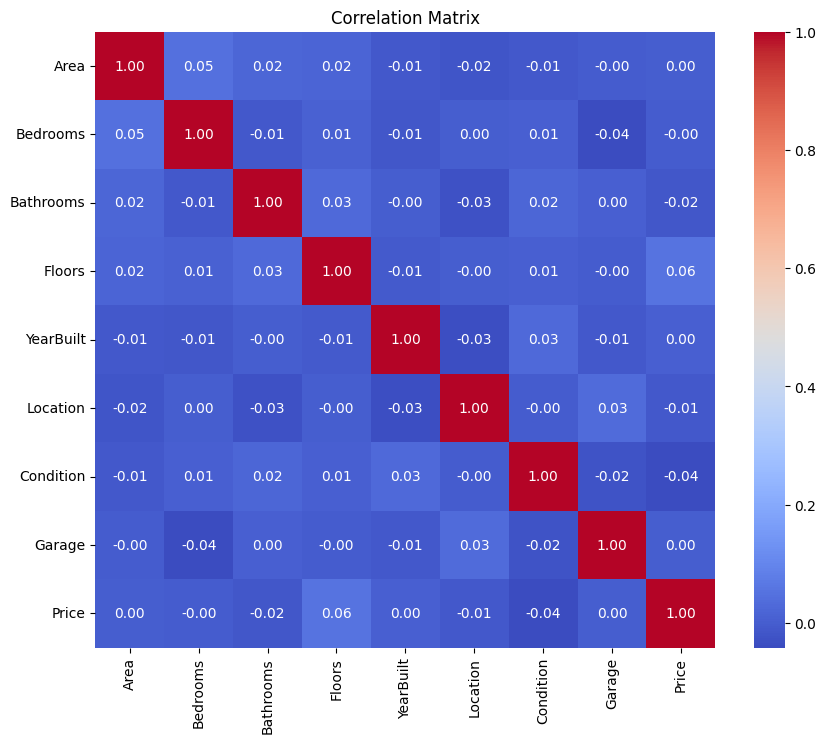

In [23]:

# compute correlation matrix
corr_matrix = house_df.corr(numeric_only=True)  

# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()
